In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [19]:
dataset = pd.read_csv('loandata.csv')
dataset

,field,graduationYear,loanAmount,selectiveCollege,sex,Default
0,STEM,2006,23159.580541,0,Male,No
1,HUMANITIES,2010,47498.061207,0,Male,Yes
2,HUMANITIES,2012,29637.519526,0,Female,No
3,STEM,2008,25369.577159,1,Female,No
4,BUSINESS,2013,42398.554574,0,Male,Yes
...,...,...,...,...,...,...
1995,BUSINESS,2006,34593.557949,0,Female,No
1996,HUMANITIES,2009,35146.672010,0,Female,Yes
1997,STEM,2012,47883.543619,0,Male,No
1998,BUSINESS,2006,42817.102001,1,Female,No


In [20]:
dataset.field.value_counts()

STEM          989
HUMANITIES    623
BUSINESS      388
Name: field, dtype: int64

### Converting category variables to dummy variables.

So we convert $field$, $sex$ and $Default$ categorical features to numerical variables using **pd.get_dummies()** function. 


In [22]:
dataset_dummied = pd.get_dummies(dataset,drop_first=True)
dataset_dummied

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male,Default_Yes
0,2006,23159.580541,0,0,1,1,0
1,2010,47498.061207,0,1,0,1,1
2,2012,29637.519526,0,1,0,0,0
3,2008,25369.577159,1,0,1,0,0
4,2013,42398.554574,0,0,0,1,1
...,...,...,...,...,...,...,...
1995,2006,34593.557949,0,0,0,0,0
1996,2009,35146.672010,0,1,0,0,1
1997,2012,47883.543619,0,0,1,1,0
1998,2006,42817.102001,1,0,0,0,0


### Shuffling dataset

In [23]:
from sklearn.utils import shuffle

dataset_shuffled = shuffle(dataset_dummied)
dataset_shuffled

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male,Default_Yes
874,2005,39789.769739,0,0,1,1,0
1341,2014,39716.441508,1,0,0,1,0
1455,2008,33548.557421,0,1,0,1,0
1691,2009,39084.003002,0,1,0,0,0
426,2012,38746.392279,0,0,1,1,0
...,...,...,...,...,...,...,...
1938,2012,35348.153610,0,0,0,0,0
297,2010,55175.202342,0,0,1,1,0
1652,2010,30951.212099,1,1,0,0,1
1323,2014,44646.890099,1,0,1,1,0


In [24]:
X_train = dataset_shuffled.iloc[0:1000,:-1]
X_train

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male
874,2005,39789.769739,0,0,1,1
1341,2014,39716.441508,1,0,0,1
1455,2008,33548.557421,0,1,0,1
1691,2009,39084.003002,0,1,0,0
426,2012,38746.392279,0,0,1,1
...,...,...,...,...,...,...
251,2009,41707.211712,0,0,1,1
852,2009,37696.328259,0,0,0,1
216,2011,33983.048320,0,1,0,0
1647,2005,28208.218259,1,1,0,1


In [25]:
y_train = dataset_shuffled['Default_Yes'][0:1000]
y_train

874     0
1341    0
1455    0
1691    0
426     0
       ..
251     0
852     0
216     1
1647    0
1103    0
Name: Default_Yes, Length: 1000, dtype: uint8

In [26]:
X_validate = dataset_shuffled.iloc[1000:1500,:-1]
X_validate

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male
1365,2013,39076.451312,0,0,1,1
1008,2014,26495.551549,0,0,0,0
1319,2010,36062.281585,0,0,1,1
620,2012,44851.800834,0,0,1,0
1956,2010,50232.763100,0,1,0,1
...,...,...,...,...,...,...
562,2011,40771.095120,0,0,1,0
1346,2008,44225.521937,0,0,1,0
524,2014,31598.586885,1,0,1,1
885,2011,46135.553455,0,0,1,1


In [27]:
y_validate = dataset_shuffled['Default_Yes'][1000:1500]
y_validate

1365    0
1008    0
1319    0
620     0
1956    1
       ..
562     0
1346    0
524     0
885     0
889     0
Name: Default_Yes, Length: 500, dtype: uint8

In [28]:
X_test = dataset_shuffled.iloc[1500:,:-1]
X_test

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male
1557,2010,30794.711559,0,1,0,1
492,2012,36894.506620,1,0,1,1
914,2007,44219.433600,0,0,0,0
1797,2011,35063.234515,1,0,1,0
1671,2013,39067.617411,0,1,0,1
...,...,...,...,...,...,...
1938,2012,35348.153610,0,0,0,0
297,2010,55175.202342,0,0,1,1
1652,2010,30951.212099,1,1,0,0
1323,2014,44646.890099,1,0,1,1


In [29]:
y_test = dataset_shuffled['Default_Yes'][1500:]
y_test

1557    1
492     0
914     0
1797    0
1671    1
       ..
1938    0
297     0
1652    1
1323    0
1632    0
Name: Default_Yes, Length: 500, dtype: uint8

### Accuracy of naiive benchmark

In [30]:
y_train.value_counts()

0    759
1    241
Name: Default_Yes, dtype: int64

So **0** is the majority class.

So now we check how many 0's we have got in the validation data which will be the naive benchmark. 

In [31]:
naive_accuracy = (y_validate.value_counts()[0]/(y_validate.value_counts()[0] + y_validate.value_counts()[1]))
print(f'Naive Benchmark on Validation set = {round(naive_accuracy*100,3)}%')

Naive Benchmark on Validation set = 75.8%


### Decision Tree using default settings

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
# Predicting on Training data
y_train_pred = dt.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

In [35]:
y_validate_pred = dt.predict(X_validate)
score = accuracy_score(y_validate,y_validate_pred)
print(f'The accuracy score on validation set is {round(score*100,2)}%')

The accuracy score on validation set is 82.2%


Predicting on the train data with default setting, we can see that the tree overfits the data and hence leads to a accuracy score of 1 i.e. it does all classifcations correctly. But this model is less performant on the validation dataset but its still better than the naive benchmark. 

### Fitting Decision Tree for max_depth ranging from 1 to 15

In [36]:
cols = ['Max_Depth','Training Accuracy Score','Validation Accuracy Score']
depth = np.arange(1,16)
scores = []

In [37]:
for d in range(1,16):
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_validate = dt.predict(X_validate)
    scores.append((d,accuracy_score(y_train,y_pred_train),accuracy_score(y_validate,y_pred_validate)))

In [38]:
dt_df = pd.DataFrame(scores,columns=cols)
dt_df

,Max_Depth,Training Accuracy Score,Validation Accuracy Score
0,1,0.815,0.864
1,2,0.889,0.878
2,3,0.890,0.878
3,4,0.890,0.878
4,5,0.903,0.868
5,6,0.907,0.866
6,7,0.919,0.860
7,8,0.933,0.852
8,9,0.945,0.828
9,10,0.962,0.830


/Users/royrajchamp/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


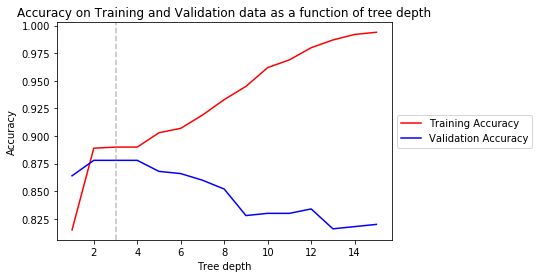

In [39]:
plt.plot(dt_df.Max_Depth,dt_df['Training Accuracy Score'],'r',label="Training Accuracy")
plt.plot(dt_df.Max_Depth,dt_df['Validation Accuracy Score'],'b',label="Validation Accuracy")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Validation data as a function of tree depth')
plt.axvline(x=3,color='gray',alpha=0.5,linestyle='--')
plt.show()

We can see that as we increase the tree depth, the performance on the training data improves drastically. But after d=4, the performance on validation set decreases and this is due to overfitting. This is because the tree learns the training data too well and doesn't generalise well on validation data which causes validation accuracy to fall. So we will choose **max_depth = 3** as it leads to the highest validation accuracy and also to keep our model simple.

### Training the best classifier on train + validation set and then testing on Test Set

In [40]:
X_train_new = dataset_shuffled.iloc[0:1500,:-1]
X_train_new

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male
874,2005,39789.769739,0,0,1,1
1341,2014,39716.441508,1,0,0,1
1455,2008,33548.557421,0,1,0,1
1691,2009,39084.003002,0,1,0,0
426,2012,38746.392279,0,0,1,1
...,...,...,...,...,...,...
562,2011,40771.095120,0,0,1,0
1346,2008,44225.521937,0,0,1,0
524,2014,31598.586885,1,0,1,1
885,2011,46135.553455,0,0,1,1


In [41]:
y_train_new = dataset_shuffled['Default_Yes'][0:1500]
y_train_new

874     0
1341    0
1455    0
1691    0
426     0
       ..
562     0
1346    0
524     0
885     0
889     0
Name: Default_Yes, Length: 1500, dtype: uint8

In [42]:
dt_best = DecisionTreeClassifier(max_depth=3)
dt_best.fit(X_train_new,y_train_new)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f'Out of sample accuracy on test data = {round(score * 100,2)}%')

Out of sample accuracy on test data = 83.4%


The out of samply accuracy on test data is sightly more than accuracy on validation data.

### Visualising Decision Tree on full dataset

In [43]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [44]:
X_train_full = dataset_shuffled.iloc[:,:-1]
X_train_full

,graduationYear,loanAmount,selectiveCollege,field_HUMANITIES,field_STEM,sex_Male
874,2005,39789.769739,0,0,1,1
1341,2014,39716.441508,1,0,0,1
1455,2008,33548.557421,0,1,0,1
1691,2009,39084.003002,0,1,0,0
426,2012,38746.392279,0,0,1,1
...,...,...,...,...,...,...
1938,2012,35348.153610,0,0,0,0
297,2010,55175.202342,0,0,1,1
1652,2010,30951.212099,1,1,0,0
1323,2014,44646.890099,1,0,1,1


In [45]:
y_train_full = dataset_shuffled['Default_Yes']
y_train_full

874     0
1341    0
1455    0
1691    0
426     0
       ..
1938    0
297     0
1652    1
1323    0
1632    0
Name: Default_Yes, Length: 2000, dtype: uint8

In [46]:
dt_full = DecisionTreeClassifier(max_depth=3)
dt_full.fit(X_train_full,y_train_full)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

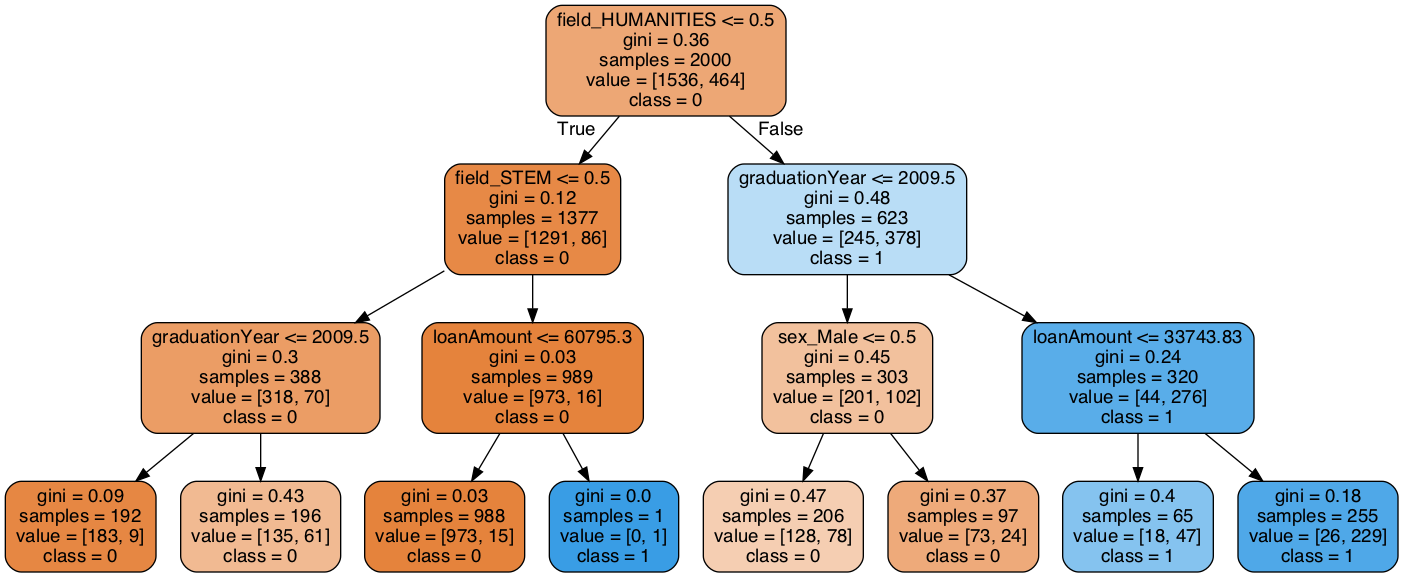

In [47]:
# Create DOT data
dot_data = tree.export_graphviz(dt_full, out_file=None, 
                                feature_names=X_train_full.columns,
                                class_names=['0','1'],
                                rounded = True, 
                                proportion = False, 
                                precision = 2, 
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
#graph.write_png('tree.png')

In [48]:
from sklearn.tree.export import export_text
r = export_text(dt_full, feature_names=list(X_train_full.columns))
print(r)

|--- field_HUMANITIES <= 0.50
|   |--- field_STEM <= 0.50
|   |   |--- graduationYear <= 2009.50
|   |   |   |--- class: 0
|   |   |--- graduationYear >  2009.50
|   |   |   |--- class: 0
|   |--- field_STEM >  0.50
|   |   |--- loanAmount <= 60795.30
|   |   |   |--- class: 0
|   |   |--- loanAmount >  60795.30
|   |   |   |--- class: 1
|--- field_HUMANITIES >  0.50
|   |--- graduationYear <= 2009.50
|   |   |--- sex_Male <= 0.50
|   |   |   |--- class: 0
|   |   |--- sex_Male >  0.50
|   |   |   |--- class: 0
|   |--- graduationYear >  2009.50
|   |   |--- loanAmount <= 33743.83
|   |   |   |--- class: 1
|   |   |--- loanAmount >  33743.83
|   |   |   |--- class: 1

